In [52]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("elephants.csv")
df.shape

(61985, 16)

In [3]:
df.head()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,1977,II,Loxodonta africana,Mammalia,Proboscidea,Elephantidae,Loxodonta,AU,GB,XX,NaN,4.0,tusks,kg,NaN,NaN
1,1977,II,Loxodonta africana,Mammalia,Proboscidea,Elephantidae,Loxodonta,AU,GB,NaN,4.0,NaN,live,NaN,NaN,NaN
2,1977,II,Loxodonta africana,Mammalia,Proboscidea,Elephantidae,Loxodonta,BE,DE,KE,NaN,2250.0,ivory carvings,kg,NaN,NaN
3,1977,II,Loxodonta africana,Mammalia,Proboscidea,Elephantidae,Loxodonta,BE,GB,XX,NaN,150.0,tusks,NaN,NaN,NaN
4,1977,II,Loxodonta africana,Mammalia,Proboscidea,Elephantidae,Loxodonta,BE,GB,ZM,NaN,6.0,tusks,NaN,NaN,NaN


In [4]:
tusk = df[df.Term == 'tusks']
tusk.Unit.value_counts()

kg           3046
g              77
pairs           7
m3              1
shipments       1
Name: Unit, dtype: int64

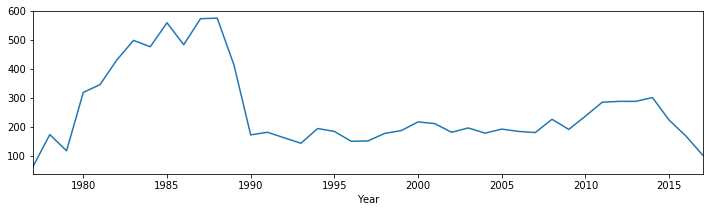

In [13]:
tusk.sort_values(by='Year').groupby('Year').size().plot(figsize=(12,3))

In [36]:
hk_ex = tusk[tusk.Exporter == 'HK']
hk_ex.Unit.value_counts()

kg    415
g       3
Name: Unit, dtype: int64

In [38]:
hk_ex[hk_ex.Unit.isna()]
# Use exporter reportd quantity as quantity when the former is available
hk_ex['quantity'] = hk_ex['Exporter reported quantity']
# Use importer reportd quantity as quantity when exporter reportd quantity is not available
hk_ex.loc[hk_ex.quantity.isnull(), 'quantity'] = hk_ex['Importer reported quantity']

/Users/grace/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
hk_ex['quantity_kg'] = hk_ex['quantity']
hk_ex.loc[hk_ex.Unit == 'g', 'quantity_kg'] = hk_ex['quantity'] / 1000
hk_ex[hk_ex.Unit == 'g']
hk_ex.groupby('Importer').quantity_kg.sum().sort_values(ascending=False)

/Users/grace/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Importer
JP    776024.410
CN    124639.000
IN     91873.000
TW     32155.000
MO     20350.000
DE     16557.900
US     15990.245
DD     12906.000
TH     10111.000
SG      7187.270
BN      4998.000
FR      4664.000
XX      3593.000
ZA      2898.000
GB      1614.000
KR       571.000
ID       420.000
IT       350.000
CH       273.000
PH       204.000
ES       175.000
MY       169.000
SZ        83.000
CA        79.000
NC        19.000
ZW        18.000
NL        16.000
SE         6.000
BE         6.000
NZ         5.000
LC         4.000
LU         3.000
AU         2.000
DK         1.000
Name: quantity_kg, dtype: float64

In [40]:
# hk_ex.sort_values(by='Year').groupby('Year').sum('').plot(figsize=(12,3))
hk_ex.groupby('Year').quantity_kg.sum()

Year
1977        11.000
1978     54064.000
1979      1329.556
1980    119281.900
1981    147185.268
1982    172029.361
1983    199820.060
1984     80582.000
1985     94924.000
1986     36975.000
1987     63433.000
1988     96027.410
1989     61919.000
1990       333.000
1991         4.000
1992         1.000
1993         5.000
1994         1.000
1995        29.270
1996        10.000
Name: quantity_kg, dtype: float64

In [9]:
hk_im = tusk[tusk.Importer == 'HK']
hk_im.Unit.value_counts()

kg    399
Name: Unit, dtype: int64

In [10]:
hk_im[hk_im.Unit.isna()]
# Use importer reportd quantity as quantity when the former is available
hk_im['quantity'] = hk_im['Importer reported quantity']
# Use exporter reportd quantity as quantity when importer reportd quantity is not available
hk_im.loc[hk_im.quantity.isnull(), 'quantity'] = hk_im['Exporter reported quantity']

/Users/grace/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
hk_im.groupby('Exporter').quantity.sum().sort_values(ascending=False)

Exporter
SD    1037415.000
JP     460011.000
CF     390816.000
BE     258585.000
CG     258258.000
FR     243889.457
ZA     167723.000
SG     161510.000
SO      95291.000
UG      88400.000
BI      74034.000
GB      56297.000
TD      54851.000
ZM      34357.000
TZ      31795.000
CD      31020.000
DE      28787.000
KE      25184.000
XX      22437.000
MZ      20921.000
DJ      10901.000
ZW       7562.000
CH       7330.000
AE       6422.000
NL       5194.840
ET       5011.000
CM       4827.000
US       4820.000
LU       4143.000
CN       3368.000
PT       3249.000
BW       3109.000
MO       1865.000
TW       1003.000
ES        698.700
DD        655.000
AT        628.530
MW        469.000
IN        424.000
CI        212.000
IT        124.000
SI         31.930
SE         29.900
CA         29.000
KR         20.000
HU         18.000
PL         17.000
EE         12.000
LT          9.000
DK          6.000
AU          6.000
MC          1.000
Name: quantity, dtype: float64

In [41]:
hk_im.groupby('Year').quantity.sum()

Year
1977      5223.000
1978    385831.000
1979     81632.000
1980    548811.000
1981    529417.000
1982    463322.000
1983    580216.000
1984    267618.000
1985    147851.000
1986    150034.000
1987    166479.000
1988    219838.000
1989     60534.000
1990       595.000
1991         1.000
1995         2.000
2000         3.000
2002         4.000
2003         1.000
2005         4.000
2006         2.000
2008        97.000
2009       102.000
2010         9.000
2011       256.690
2012       133.000
2013       241.000
2014      4209.667
2015       742.000
2016       389.000
2017       215.000
Name: quantity, dtype: float64

In [48]:
s1 = pd.DataFrame(hk_ex.groupby('Year').quantity_kg.sum())
s2 = pd.DataFrame(hk_im.groupby('Year').quantity.sum())
compare = pd.concat([s1, s2], axis=1)
compare.columns = ['export', 'import']

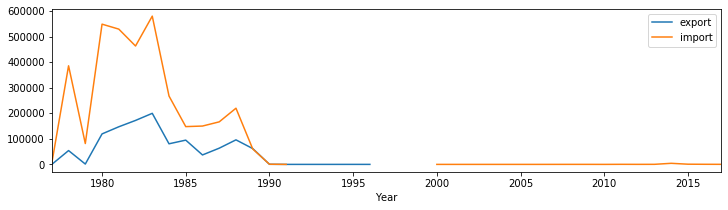

In [53]:
compare.plot(figsize=(12,3))
plt.savefig("year changes.png")